# 7. Exercise solutions

In [1]:
import numpy as np
from math import cos, sin, atan, pi
import matplotlib.pyplot as plt


def rotate(x, y, theta=90):
    '''
    Rotate coordinate lists/arrays x and y rotated angle theta [deg] clockwise. 
    Returns the rotated coordinates as arrays.
    '''
    
    # Convert angle to radians
    theta = pi * theta / 180
    
    # Define rotation matrix    
    R = np.array([[cos(theta), sin(theta), 0],
                  [-sin(theta), cos(theta), 0],
                  [0, 0, 1]])

    # Define array of original coordinates 
    xy1 = np.array([x, y, np.ones(len(x))])
    
    # Compute rotated coordinates
    xr, yr, _ = np.matmul(R, xy1)

    return xr, yr



# Test arrays to transform
x = np.array([-5, 5, 5, 0.5, 0.5, 5, 5, -5, -5, -0.5, -0.5, -5, -5])
y = np.array([-8, -8, -6, -6, 6, 6, 8, 8, 6, 6, -6, -6, -8])

# Call the function with test arrays
xr, yr = rotate(x, y, theta=45)

# Display the rotated x-coordinates
xr

array([-9.19238816, -2.12132034, -0.70710678, -3.8890873 ,  4.59619408,
        7.77817459,  9.19238816,  2.12132034,  0.70710678,  3.8890873 ,
       -4.59619408, -7.77817459, -9.19238816])

In [2]:
# Display the rotated y-coordinates
yr

array([-2.12132034, -9.19238816, -7.77817459, -4.59619408,  3.8890873 ,
        0.70710678,  2.12132034,  9.19238816,  7.77817459,  4.59619408,
       -3.8890873 , -0.70710678, -2.12132034])

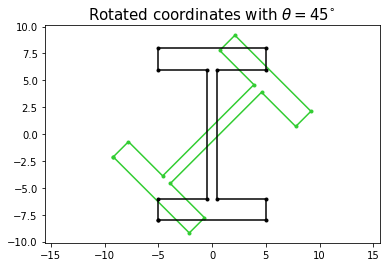

In [3]:
def plot_transform(xt, yt, x=None, y=None, title=None):
    ''' 
    Plot the transformed coordinates (xr, yr). Optionally plot the original coordinates (x, y).
    All four inputs are of type list or array and should all have same length. 
    Optionally give a title to the plot-function as a string.
    '''
    
    # Plot transformed coordintes
    plt.plot(xt, yt, '.-', color='limegreen')
    
    # Plot original coordinates if they were input
    if x is not None and y is not None:
        plt.plot(x, y, '.-', color='black')
        
    # Set title if that was input
    if title:
        plt.title(title, fontsize=15)
        
    # Set same scaling on x- and y-axis and show the plot
    plt.axis('equal')    
    plt.show()
    
    
# Plot rotated coordinates from previosly
rotate_title = 'Rotated coordinates with $\\theta = 45 ^{\circ} $'
plot_transform(xr, yr, x, y, title=rotate_title)

> **Note**: An optional `title` parameter is also implemented here, even though it was not required by the exercise text.

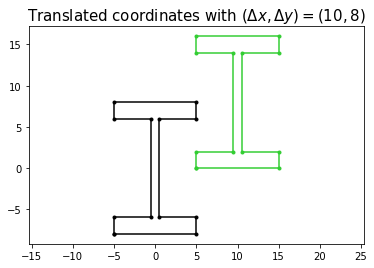

In [4]:
def translate(x, y, x_translate, y_translate):
    ''' 
    Translate coordinate lists/arrays x and y the distance x_translate in the x-direction 
    and the distance y_translate in the y-direction. Returns the translated coordinates as arrays. 
    '''
    
    # Define translation matrix
    T = np.array([[1, 0, x_translate],
                  [0, 1, y_translate],
                  [0, 0, 1]])
    
    # Define array of original coordinates
    xy1 = np.array([x, y, np.ones(len(x))])
    
    # Compute translated coordinates
    xt, yt, _ = np.matmul(T, xy1)
    
    return xt, yt


# Call the function with test arrays
xt, yt = translate(x, y, 10, 8)

# Plot the translated coordinates
translate_title = 'Translated coordinates with $(\Delta x, \Delta y) = (10, 8)$'
plot_transform(xt, yt, x, y, title=translate_title)

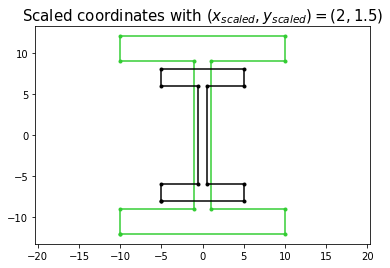

In [5]:
def scale(x, y, x_scale, y_scale):
    ''' 
    Scale coordinate lists/arrays x and y the by factors x_scale and y_scale in the x-direction 
    and y_translate, respectively. Returns the scaled coordinates as arrays.  
    '''
    
    # Define scaling matrix
    S = np.array([[x_scale, 0, 0],
                  [0, y_scale, 0],
                  [0, 0, 1]])
    
    # Define array of original coordinates
    xy1 = np.array([x, y, np.ones(len(x))])
    
    # Compute scaled coordinates
    xs, ys, _ = np.matmul(S, xy1)
    
    return xs, ys


# Call the function with test arrays
xs, ys = scale(x, y, 2, 1.5)

# Plot the scaled coordinates
scale_title = 'Scaled coordinates with $(x_{scaled}, y_{scaled}) = (2, 1.5)$'
plot_transform(xs, ys, x, y, title=scale_title)


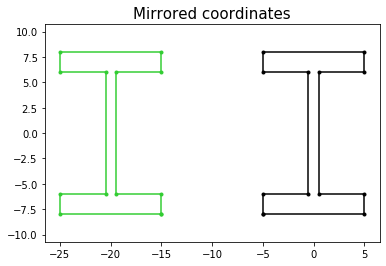

In [6]:
def mirror(x, y):
    ''' 
    Mirror coordinate lists/arrays x and y about the y-axis. Returns the mirrored 
    coordinates as arrays. 
    '''
    
    # Define translation matrix
    M = np.array([[-1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
    
    # Define array of original coordinates
    xy1 = np.array([x, y, np.ones(len(x))])
    
    # Compute new coordinates
    xm, ym, _ = np.matmul(M, xy1)
    
    return xm, ym


# Call the function with test arrays with 20 added to all x-values
xm, ym = mirror(x+20, y)

# Plot the mirrored coordinates
mirror_title = 'Mirrored coordinates'
plot_transform(xm, ym, x, y, title=mirror_title)

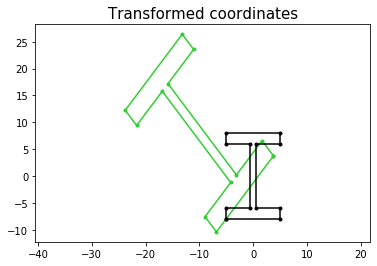

In [7]:
def transform(x, y, rotation=0, scaling=(1, 1), translation=(0, 0), mirroring=False):
    '''
    Perform a combined coordinate tranformation according to given inputs. 
    Returns the transformed coordinates as arrays.
    If no inputs are given, returns the unchanged coordinates.

    Args:
        x (array)                   : x-values to transform.
        y (array)                   : y-values to transform.
        rotate (float, optional)    : Clockwise rotation angle in [deg]. Defaults to no rotation.
        scale (float, optional)     : Scaling factor in axes directions (cx, cy). Defaults to no scaling.
        translate (tuple, optional) : Translation in axes directions (dx, dy). Defaults to no translation.
        mirror (bool, optional)     : Whether or not to mirror the coordinates, Defaults to no mirroring.
    '''
    
    # Rotate coordinates 
    xt, yt = rotate(x, y, theta=rotation)
    
    # Scale coordinates
    xt, yt = scale(xt, yt, scaling[0], scaling[1])
    
    # Translate coordinates
    xt, yt = translate(xt, yt, translation[0], translation[1])
    
    # Mirror coordinates if input parameter mirroring is set to True
    if mirroring:
        xt, yt = mirror(xt, yt)

    # Return transformed coordinates as numpy arrays
    return xt, yt


# Call the function with test arrays
xt, yt = transform(x, y, rotation=45, scaling=(1.5, 2), translation=(10, 8), mirroring=True)

# Plot the transformed coordinates
transform_title = 'Transformed coordinates'
plot_transform(xt, yt, x, y, title=transform_title)

# End of exercises

*The cell below is for setting the style of this document. It's not part of the exercises.*

In [8]:
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))